# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [51]:
#Based on the documentation, the data represents 17 marketing campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [52]:
import pandas as pd

In [53]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [54]:
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [56]:
# The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


In [57]:
# Let's understand the data set
for col in df.columns:
    print(col, df[col].nunique())

df.count()

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


,0
age,41188
job,41188
marital,41188
education,41188
default,41188
housing,41188
loan,41188
contact,41188
month,41188
day_of_week,41188


In [58]:
# For list of columns that are string, find out what are the distinct values along with the counts.
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        print(df[col].value_counts())

job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
default
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
housing
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
loan
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64
contact
contact
cellular 

In [59]:
# Check if there are any nulls in the data set
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [60]:
# Let's use imputation to convert string columns to integer values
# We need to make sure that we remove spaces and lower the values in order to map it
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df['y'] = df['y'].str.strip().str.lower().map({'yes': 1, 'no': 0})
df['marital'] = df['marital'].str.strip().str.lower().map({'single': 0, 'married': 1, 'divorced': 2})
df['default'] = df['default'].str.strip().str.lower().map({'no': 0, 'yes': 1, 'unknown': 2})
df['housing'] = df['housing'].str.strip().str.lower().map({'no': 0, 'yes': 1, 'unknown': 2})
df['loan'] = df['loan'].str.strip().str.lower().map({'no': 0, 'yes': 1, 'unknown': 2})
df['contact'] = df['contact'].str.strip().str.lower().map({'cellular': 0, 'telephone': 1})
df['day_of_week'] = df['day_of_week'].str.strip().str.lower().map({'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6})
df['month'] = df['month'].str.strip().str.lower().map({'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep':8, 'oct': 9, 'nov': 10, 'dec': 11})
df['poutcome'] = df['poutcome'].str.strip().str.lower().map({'failure': 0, 'nonexistent': 1, 'success': 2})
df.head(10)




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1.0,basic.4y,0,0,0,1,4,0,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,1.0,high.school,2,0,0,1,4,0,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,1.0,high.school,0,1,0,1,4,0,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,1.0,basic.6y,0,0,0,1,4,0,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,1.0,high.school,0,0,1,1,4,0,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,1.0,basic.9y,2,0,0,1,4,0,198,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,1.0,professional.course,0,0,0,1,4,0,139,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,1.0,unknown,2,0,0,1,4,0,217,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,0.0,professional.course,0,1,0,1,4,0,380,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,0.0,high.school,0,1,0,1,4,0,50,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [61]:
df['y'].value_counts()

,count
y,
0,36548
1,4640


The name of the column is age


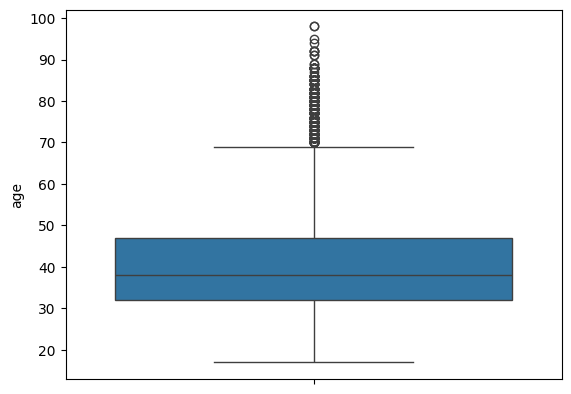

The name of the column is job


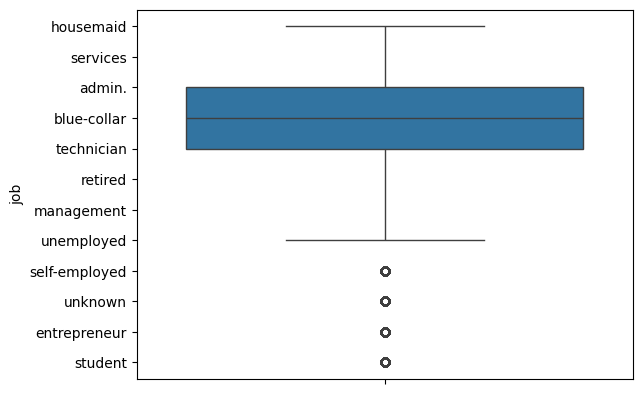

The name of the column is marital


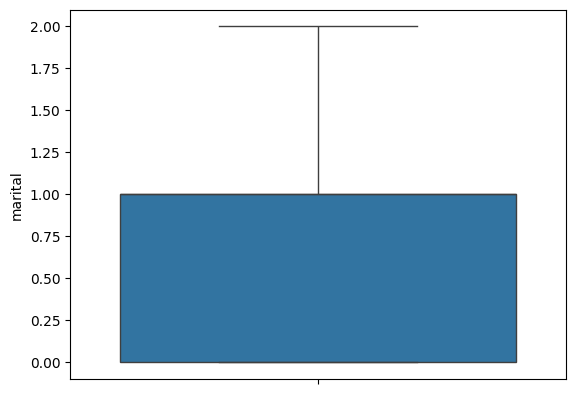

The name of the column is education


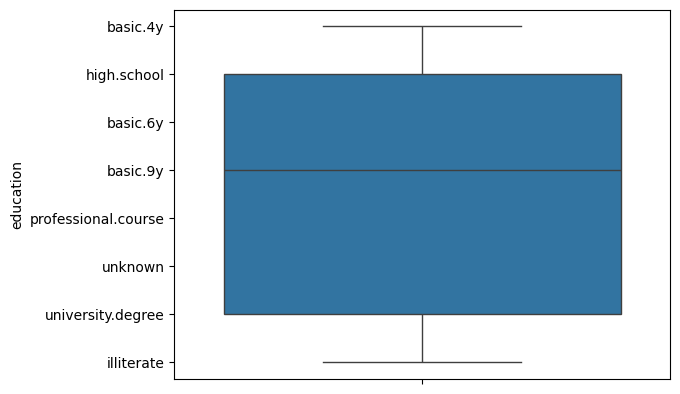

The name of the column is default


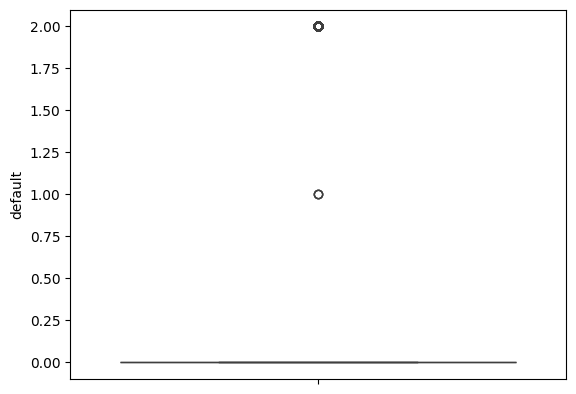

The name of the column is housing


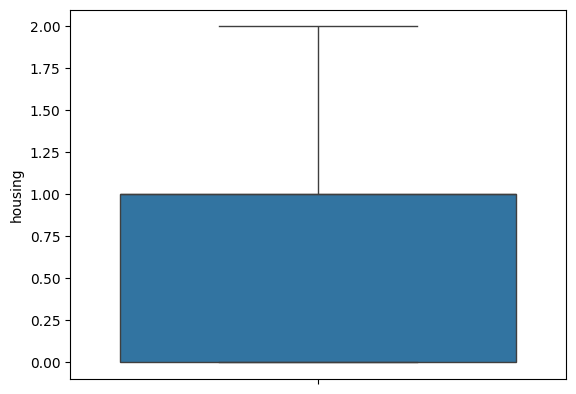

The name of the column is loan


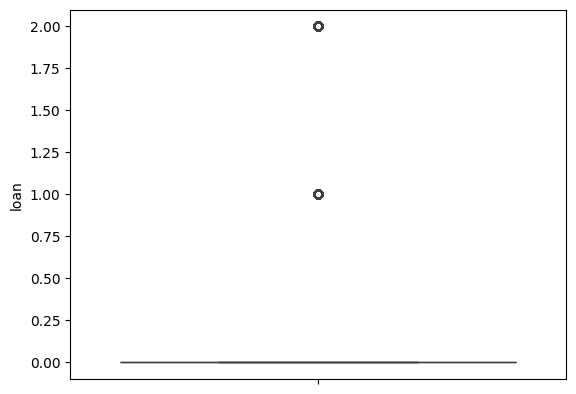

The name of the column is contact


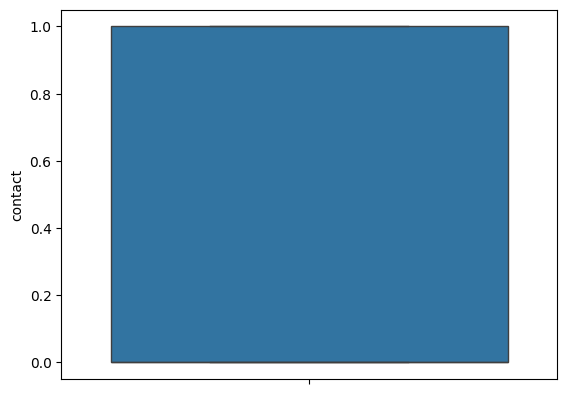

The name of the column is month


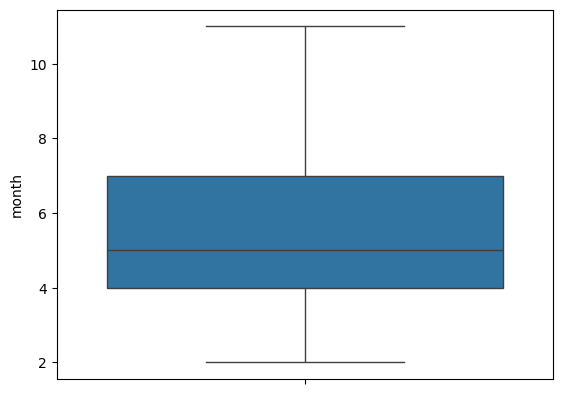

The name of the column is day_of_week


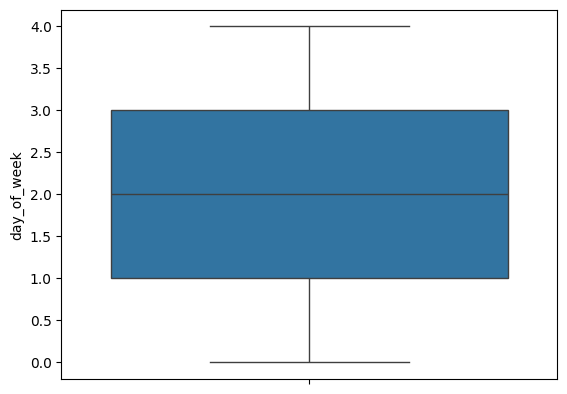

The name of the column is duration


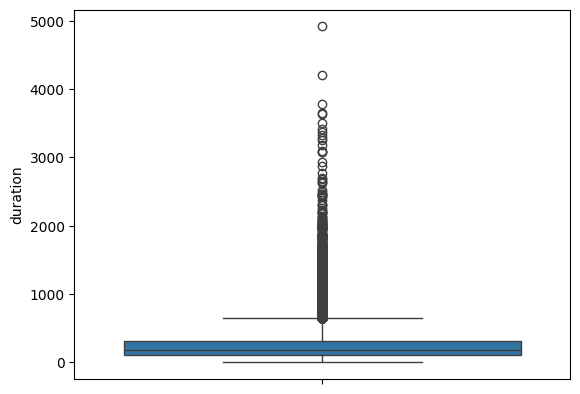

The name of the column is campaign


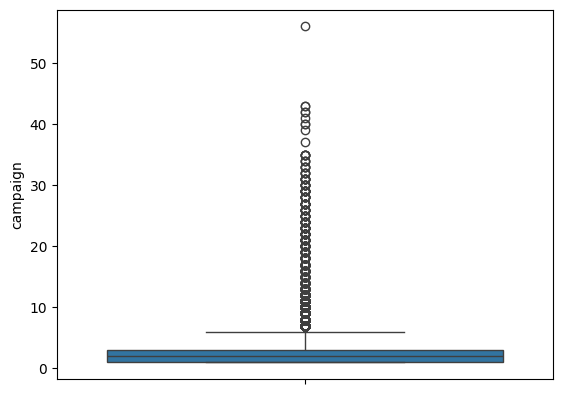

The name of the column is pdays


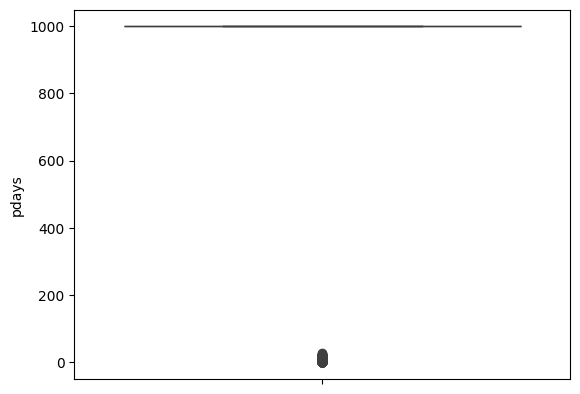

The name of the column is previous


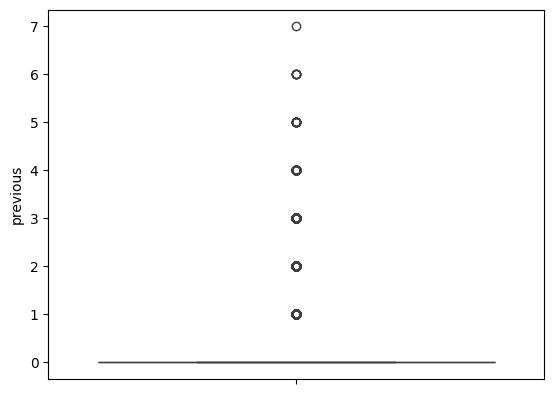

The name of the column is poutcome


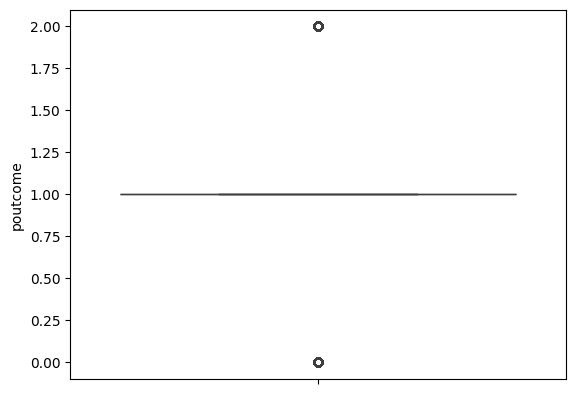

The name of the column is emp.var.rate


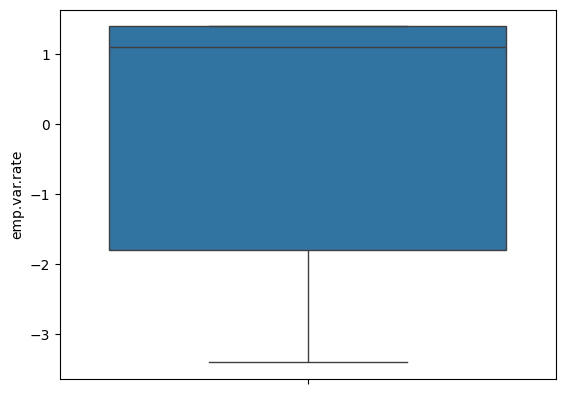

The name of the column is cons.price.idx


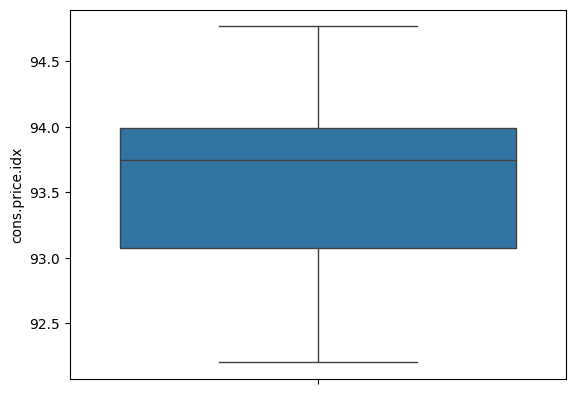

The name of the column is cons.conf.idx


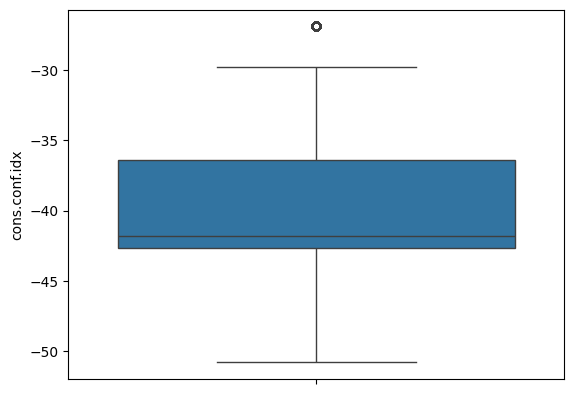

The name of the column is euribor3m


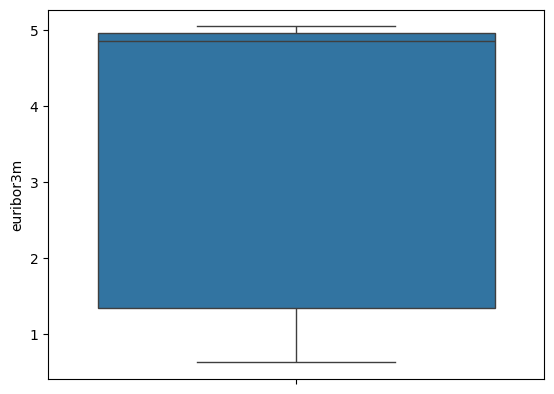

The name of the column is nr.employed


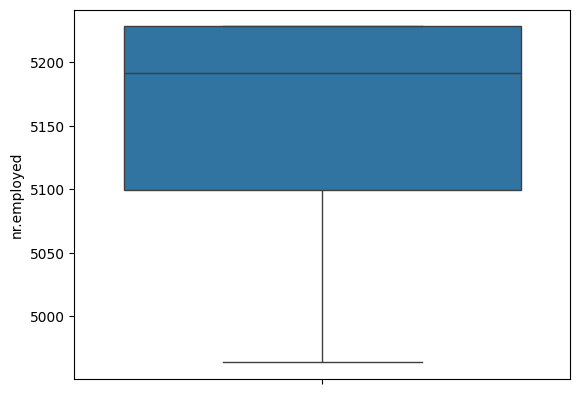

The name of the column is y


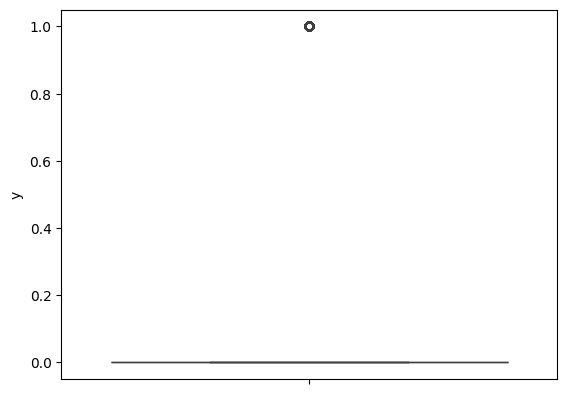

In [62]:
# Let's draw box plots of all columns to see if there are any outliers
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

for col in df.columns:
    sns.boxplot(df[col])
    print(f"The name of the column is {col}")
    plt.show()

In [65]:
# Let's do one encoding on the columns job and education
df = pd.get_dummies(df, columns=['job', 'education'])
df.head()

,age,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,1.0,0,0,0,1,4,0,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,57,1.0,2,0,0,1,4,0,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,37,1.0,0,1,0,1,4,0,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,40,1.0,0,0,0,1,4,0,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,56,1.0,0,0,1,1,4,0,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


Correlation with target y:
 y                 1.000000
duration          0.405274
previous          0.230181
poutcome          0.129789
cons.conf.idx     0.054878
month             0.037187
age               0.030399
day_of_week       0.010051
housing           0.009552
loan             -0.005038
marital          -0.045975
campaign         -0.066357
default          -0.099324
cons.price.idx   -0.136211
contact          -0.144773
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64


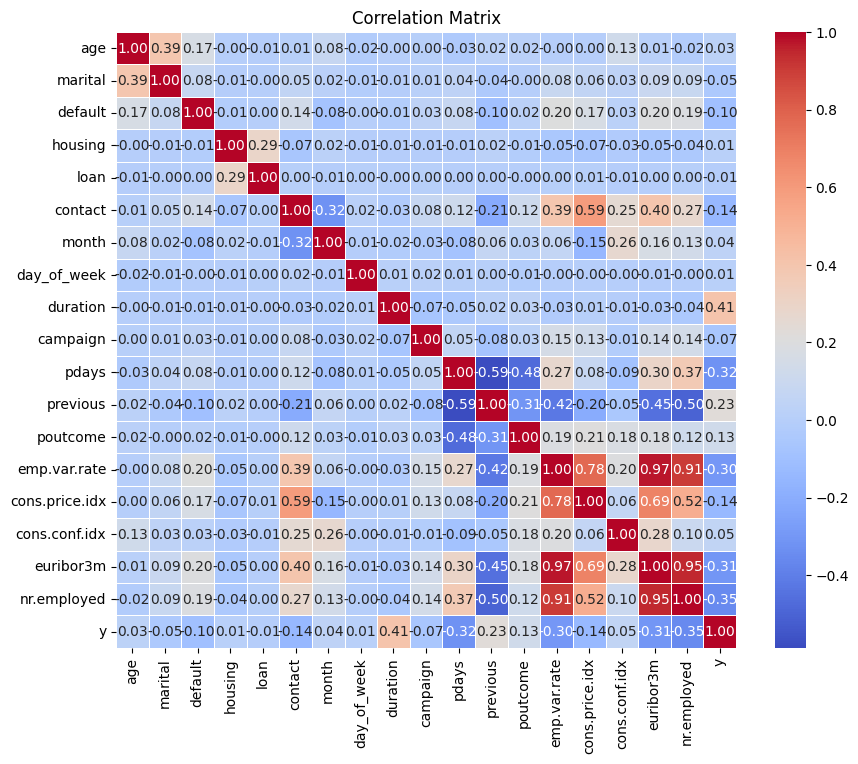

In [66]:
# Find the correlation of various columns to see which columns are affecting the most to the target column y
# Also draw correlation matrix to get visual representation

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example: load your data
# df = pd.read_csv("your_data.csv")

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation with target column 'y'
# Check if 'y' is in numeric_df columns before accessing it
if 'y' in corr_matrix.columns:
    correlation_with_y = corr_matrix['y'].sort_values(ascending=False)
    print("Correlation with target y:\n", correlation_with_y)
else:
    print("'y' is not a numeric column and cannot be included in correlation matrix.")


# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   marital                        41108 non-null  float64
 2   default                        41188 non-null  int64  
 3   housing                        41188 non-null  int64  
 4   loan                           41188 non-null  int64  
 5   contact                        41188 non-null  int64  
 6   month                          41188 non-null  int64  
 7   day_of_week                    41188 non-null  int64  
 8   duration                       41188 non-null  int64  
 9   campaign                       41188 non-null  int64  
 10  pdays                          41188 non-null  int64  
 11  previous                       41188 non-null  int64  
 12  poutcome                       41188 non-null 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [69]:
# Split the data in train and test validation. The target column is column y
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [70]:
# Suppose y_train is your target column in training data
baseline_class = y_train.value_counts().idxmax()
baseline_accuracy = (y_train == baseline_class).mean()

print("Baseline class:", baseline_class)
print("Baseline accuracy:", baseline_accuracy)

Baseline class: 0
Baseline accuracy: 0.887556904400607


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [84]:
# Let's use Logisitic Regression to build a basic model on the data set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
from sklearn.metrics import accuracy_score



# Impute missing values in the 'marital' column with the mode
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train['marital'] = imputer.fit_transform(X_train[['marital']])
X_test['marital'] = imputer.transform(X_test[['marital']])

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_logisitic_pred = logistic_model.predict(X_test_scaled)

# Create and train the KNN classifier model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test_scaled)

# Create and train Decision tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test_scaled)

# Create and train SVM Model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test_scaled)

### Problem 9: Score the Model

What is the accuracy of your model?

In [85]:
# Calculate and print the accuracy of the Logisitic regression model
accuracy = accuracy_score(y_test, y_logisitic_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

# Calculate and print the accuracy of the KNN classifier
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"Accuracy of the KNN classifier: {knn_accuracy}")

# Calculate and print the accuracy of Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Accuracy of the Decision Tree Classifier: {dt_accuracy}")

# Calculate and print the accuracy of SVM Model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Accuracy of the SVM Model: {svm_accuracy}")



Accuracy of the Logistic Regression model: 0.9102937606215101
Accuracy of the KNN classifier: 0.8959698956057296
Accuracy of the Decision Tree Classifier: 0.891964068948774
Accuracy of the SVM Model: 0.9094440398154892


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

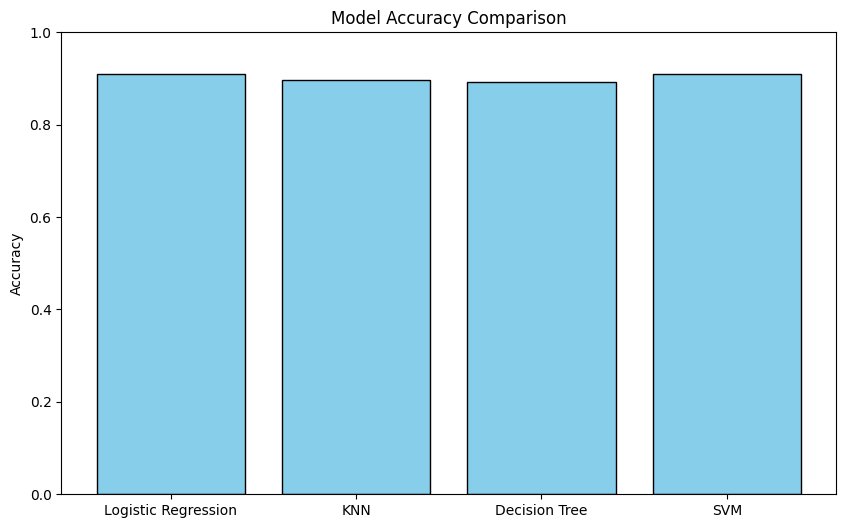

In [88]:
# Let's compare the model outputs to see which model has performed the best
# Plot the accuracy score of all the models
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
model_results = [accuracy, knn_accuracy, dt_accuracy, svm_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, model_results, color='skyblue', edgecolor='black')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis from 0 to 1
plt.show()



### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [63]:
# looks like we are getting good acuuracy score from Logistic Regression
# our efforts to convert string to integer and using One hot encoded has helped us receive good results

##### Questions